## SEN430 - Data Analysis 


### İlayda Büyükakova B1405.090024


## Description of UK Road Accidents Analysis 

### What is UK Road Accidents Dataset? 
  The dataset inspect in this assignment is available at data.gov.uk. It contains information about Great Britain road accidents circumstances, vehicle and driver data and outcomes as far back as 1979. The data is based on (standard form) police reports (so it only includes officially reported accidents). There are three linked sub datasets for each year: Accidents, Casulties and Vehicles.I load the data from the https://data.gov.uk/dataset/road-traffic-accidents, pertaining to all collisions in 2017. 

### Why did you choose this subject?
  The aim of the project is to use data science methodology to gain an understanding on the problem at hand, and develop insights for Traffic Accidents and Road Safety.This project will use U.K Road Safety Data from (2005–2017).The data consists of detailed road safety data about the circumstances of personal injury road accidents, the types of vehicles involved and the consequential casualties.
 
### Who are the final users of your analysis results? 
  I think that the results of this analysis could be used by the general public, meaning people that want to be better at staying safe in the traffic, authorities - to help them target their law enforcements and regulations at the most problematic areas, but also by others - such as insurance companies, to provide a fact base for pricing strategies.


In [1]:
# import needed libraries ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

#### First load the accident data.

In [2]:
df = pd.read_csv("dataset.csv", dtype={'Time (24hr)':object})


In [3]:
print(df.shape)
df.head()

(2203, 15)


,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,3AP0313,426340,428455,1,3/17/2017,0815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26


#### I used describe() method to have overall analyze.

In [4]:
df.describe()

,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Age of Casualty
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,429934.945983,434064.481616,1.933273,35.745347
std,5032.944882,4282.654113,0.738580,18.812355
min,415248.000000,423230.000000,1.000000,1.000000
25%,427214.000000,431764.000000,2.000000,22.000000
50%,429944.000000,434060.000000,2.000000,32.000000
75%,432127.500000,435962.500000,2.000000,48.000000
max,445311.000000,449559.000000,7.000000,96.000000


#### I am changing the name of the columns, to get rid of spaces.

In [5]:
df.columns = ['RefNum', 'GridRefEast', 'GridRefNorth', 'NumberOfVehicle', 'AccidentDate', 'Time', '1stRoadClass', 'RoadSurface', 'LightCondition' , 'WeatherCondition' , 'TypeVehicle', 'CasualtyClass', 'CasualtySeverity', 'SexCasualty', 'AgeCasualty']

In [6]:
df

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
0,3AP0313,426340,428455,1,3/17/2017,0815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
1,3BE0850,430828,433222,2,1/14/2017,1330,A61,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,36
2,4110858,428940,429856,2,1/1/2017,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,1/1/2017,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,1/1/2017,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,4CV0902,430343,431175,2,12/31/2017,1515,U,Snow,Daylight: Street lights present,Snowing without high winds,Car,Vehicle or pillion passenger,Slight,Male,21
2199,4CV1387,427748,436446,3,12/31/2017,1935,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Motorcycle 12Motorcycle over 500cccc to Motorc...,Driver or rider,Slight,Male,23
2200,4CV1544,420323,434279,2,12/31/2017,2111,B6381,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Driver or rider,Slight,Male,20
2201,51B1932,431947,435868,2,1/11/2017,2320,U,Wet/Damp,Darkness: Street lights present and lit,Fine without high winds,Motorcycle Motorcycle over 500cc0cc to 12Motor...,Driver or rider,Serious,Male,34


#### Analysis the data types of columns

In [7]:
df.dtypes

RefNum              object
GridRefEast          int64
GridRefNorth         int64
NumberOfVehicle      int64
AccidentDate        object
Time                object
1stRoadClass        object
RoadSurface         object
LightCondition      object
WeatherCondition    object
TypeVehicle         object
CasualtyClass       object
CasualtySeverity    object
SexCasualty         object
AgeCasualty          int64
dtype: object

#### I am changing the data type of Accident Date from Object to Date Time and then test it out!

In [8]:
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'])

In [9]:
df.dtypes

RefNum                      object
GridRefEast                  int64
GridRefNorth                 int64
NumberOfVehicle              int64
AccidentDate        datetime64[ns]
Time                        object
1stRoadClass                object
RoadSurface                 object
LightCondition              object
WeatherCondition            object
TypeVehicle                 object
CasualtyClass               object
CasualtySeverity            object
SexCasualty                 object
AgeCasualty                  int64
dtype: object

## Question 1:What are accidents over the year ?

#### Sorting the values according to AccidentDate

In [10]:
df.sort_values(by='AccidentDate')

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
2,4110858,428940,429856,2,2017-01-01,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,32
3,4110858,428940,429856,2,2017-01-01,0805,A653,Wet/Damp,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,30
4,4111495,429899,434277,2,2017-01-01,1705,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Slight,Female,26
5,4111706,435946,436807,2,2017-01-01,1200,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,34
8,4121054,442103,434572,2,2017-01-02,1807,M1,Dry,Darkness: No street lighting,Fine without high winds,Car,Driver or rider,Slight,Male,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,4CV0870,430983,439018,2,2017-12-31,1345,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,21
2197,4CV0902,430343,431175,2,2017-12-31,1515,U,Snow,Daylight: Street lights present,Snowing without high winds,Car,Driver or rider,Slight,Male,19
2198,4CV0902,430343,431175,2,2017-12-31,1515,U,Snow,Daylight: Street lights present,Snowing without high winds,Car,Vehicle or pillion passenger,Slight,Male,21
2199,4CV1387,427748,436446,3,2017-12-31,1935,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Motorcycle 12Motorcycle over 500cccc to Motorc...,Driver or rider,Slight,Male,23


In [14]:
df.count()

RefNum              2203
GridRefEast         2203
GridRefNorth        2203
NumberOfVehicle     2203
AccidentDate        2203
Time                2203
1stRoadClass        2203
RoadSurface         2203
LightCondition      2203
WeatherCondition    2203
TypeVehicle         2203
CasualtyClass       2203
CasualtySeverity    2203
SexCasualty         2203
AgeCasualty         2203
dtype: int64

## Question 2: What are accident ocur during the seasons?

#### I seperate the dates into the seasons. Then, I use mask method to filter required data and then use .count() method to access the number of accidents through the seasons.

In [15]:
summer_start_date = '2017-06-01'
summer_end_date = '2017-08-31'

In [16]:
mask_summer = (df['AccidentDate'] >= summer_start_date) & (df['AccidentDate'] <= summer_end_date)

In [17]:
df_mask_summer = df.loc[mask_summer]
df_mask_summer

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
597,44D0633,433999,435142,2,2017-07-04,1229,U,Dry,Daylight: Street lights present,Fine without high winds,Taxi/Private hire car,Vehicle or pillion passenger,Slight,Female,41
745,4591031,431629,435294,1,2017-06-09,1440,A58,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Serious,Male,79
863,4610704,427468,438752,1,2017-06-01,1600,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Female,11
864,4610732,425137,434208,1,2017-06-01,1220,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Female,18
865,4610951,430062,433712,1,2017-06-01,1310,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,48V0882,426188,435500,1,2017-08-28,1435,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Male,40
1367,48V1360,427452,431884,3,2017-08-31,1808,A58,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Driver or rider,Slight,Male,40
1368,48V1360,427452,431884,3,2017-08-31,1808,A58,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Vehicle or pillion passenger,Slight,Female,34
1389,4941199,430254,433541,2,2017-08-24,1000,U,Dry,Daylight: Street lights present,Fine without high winds,Car0,Driver or rider,Slight,Male,36


In [18]:
df_mask_summer.count()

RefNum              508
GridRefEast         508
GridRefNorth        508
NumberOfVehicle     508
AccidentDate        508
Time                508
1stRoadClass        508
RoadSurface         508
LightCondition      508
WeatherCondition    508
TypeVehicle         508
CasualtyClass       508
CasualtySeverity    508
SexCasualty         508
AgeCasualty         508
dtype: int64

In [19]:
spring_start_date = '2017-03-01'
spring_end_date = '2017-05-31'

In [20]:
mask_spring = (df['AccidentDate'] >= spring_start_date) & (df['AccidentDate'] <= spring_end_date)

In [21]:
df_mask_spring = df.loc[mask_spring]
df_mask_spring

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
0,3AP0313,426340,428455,1,2017-03-17,0815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
318,42L1122,430063,433752,1,2017-03-05,1629,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Female,37
350,42S0213,431917,428200,2,2017-03-02,0754,M1,Dry,Daylight: Street lights present,Fine without high winds,Motorcycle over 500cc,Driver or rider,Serious,Male,51
356,4310185,432491,434874,2,2017-03-01,0658,U,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Motorcycle Motorcycle over 500cc0cc to 12Motor...,Driver or rider,Serious,Male,21
357,4310195,417632,441398,2,2017-03-01,0720,U,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Driver or rider,Slight,Male,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,45V0271,434620,441230,2,2017-05-31,0725,U,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Driver or rider,Slight,Female,29
860,45V0514,429559,431566,3,2017-05-31,1048,U,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycle,Driver or rider,Slight,Male,19
861,45V1173,431416,435239,1,2017-05-31,1609,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Male,3
862,45V1564,425848,434400,3,2017-05-31,1800,U,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Driver or rider,Slight,Female,24


In [22]:
df_mask_spring.count()

RefNum              509
GridRefEast         509
GridRefNorth        509
NumberOfVehicle     509
AccidentDate        509
Time                509
1stRoadClass        509
RoadSurface         509
LightCondition      509
WeatherCondition    509
TypeVehicle         509
CasualtyClass       509
CasualtySeverity    509
SexCasualty         509
AgeCasualty         509
dtype: int64

In [23]:
autumn_start_date = '2017-09-01'
autumn_end_date = '2017-11-30'

In [24]:
mask_autumn = (df['AccidentDate'] >= autumn_start_date) & (df['AccidentDate'] <= autumn_end_date)

In [25]:
df_mask_autumn = df.loc[mask_autumn]
df_mask_autumn

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
1279,48C1280,429273,438616,2,2017-09-12,1718,A6120,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,31
1369,4911338,432049,426272,2,2017-09-01,1727,M1,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Driver or rider,Slight,Female,20
1370,4911467,435936,426644,1,2017-09-01,1820,A642,Dry,Darkness: Street lighting unknown,Fine without high winds,Motorcycle Motorcycle over 500cc0cc and under0,Pedestrian,Slight,Male,32
1371,4920799,436168,434724,2,2017-09-02,1220,A6120,Dry,Daylight: Street lights present,Fine without high winds,Car,Vehicle or pillion passenger,Slight,Female,10
1372,4921305,435718,436940,1,2017-09-02,1630,A6120,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Serious,Male,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,4BU0335,432676,434592,2,2017-11-30,0740,B6159,Wet/Damp,Darkness: Street lights present and lit,Fine without high winds,Car,Driver or rider,Slight,Female,43
2004,4BU0803,425291,428294,2,2017-11-30,1315,M621,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,25
2005,4BU1214,431383,434012,1,2017-11-30,1510,U,Wet/Damp,Daylight: Street lights present,Snowing without high winds,Pedal cyclePedal cycle,Vehicle or pillion passenger,Slight,Female,55
2163,4CO0828,443351,438926,2,2017-09-05,1433,A1(M),Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,36


In [26]:
df_mask_autumn.count()

RefNum              639
GridRefEast         639
GridRefNorth        639
NumberOfVehicle     639
AccidentDate        639
Time                639
1stRoadClass        639
RoadSurface         639
LightCondition      639
WeatherCondition    639
TypeVehicle         639
CasualtyClass       639
CasualtySeverity    639
SexCasualty         639
AgeCasualty         639
dtype: int64

In [27]:
winter_start_date = '2017-12-01'
winter_end_date = '2017-02-28'

In [28]:
mask_winter = (df['AccidentDate'] >= winter_end_date ) & (df['AccidentDate'] <= winter_start_date)

In [29]:
df_mask_winter = df.loc[mask_winter]
df_mask_winter

,RefNum,GridRefEast,GridRefNorth,NumberOfVehicle,AccidentDate,Time,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty
0,3AP0313,426340,428455,1,2017-03-17,0815,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,Serious,Female,61
318,42L1122,430063,433752,1,2017-03-05,1629,U,Dry,Daylight: Street lights present,Fine without high winds,Car,Pedestrian,Slight,Female,37
350,42S0213,431917,428200,2,2017-03-02,0754,M1,Dry,Daylight: Street lights present,Fine without high winds,Motorcycle over 500cc,Driver or rider,Serious,Male,51
351,42S0227,432866,427586,2,2017-02-28,0800,A654,Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,35
352,42S0853,423910,430226,1,2017-02-28,1425,U,Dry,Daylight: Street lights present,Fine without high winds,Pedal cycleCar,Pedestrian,Serious,Male,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,4C12027,429274,435266,2,2017-12-01,2330,U,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Vehicle or pillion passenger,Slight,Male,28
2026,4C12027,429274,435266,2,2017-12-01,2330,U,Dry,Darkness: Street lighting unknown,Fine without high winds,Car,Vehicle or pillion passenger,Slight,Male,25
2163,4CO0828,443351,438926,2,2017-09-05,1433,A1(M),Dry,Daylight: Street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,36
2164,4CO0828,443351,438926,2,2017-09-05,1433,A1(M),Dry,Daylight: Street lights present,Fine without high winds,Car,Vehicle or pillion passenger,Slight,Female,27


In [30]:
df_mask_winter.count()

RefNum              1682
GridRefEast         1682
GridRefNorth        1682
NumberOfVehicle     1682
AccidentDate        1682
Time                1682
1stRoadClass        1682
RoadSurface         1682
LightCondition      1682
WeatherCondition    1682
TypeVehicle         1682
CasualtyClass       1682
CasualtySeverity    1682
SexCasualty         1682
AgeCasualty         1682
dtype: int64

In [31]:
import matplotlib.pyplot as plt

In [32]:
labels = 'Winter', 'Summer', 'Spring', 'Autumn'
sizes = [1682, 508, 509, 639]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

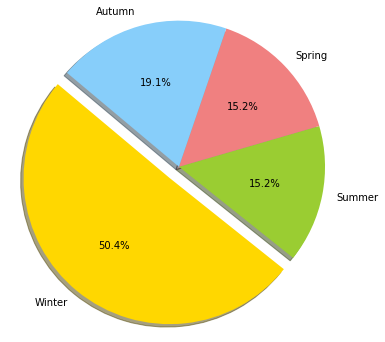

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Question 3: What are accidents ocur during the hours of the day ?
#### I'm using groupby() method to group the Time column and then size() method to look the divisions.

In [34]:
group_by_time = df.groupby(['Time'])

In [35]:
group_by_time

In [36]:
group_by_time.size()

Time
0004    1
0005    2
0006    1
0009    2
0010    1
       ..
2343    1
2345    7
2350    1
2352    1
2356    1
Length: 633, dtype: int64

In [37]:
#needed libraries
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
time_totals = group_by_time.size()

#### The plot graph of distrubition of time to number of accidents.

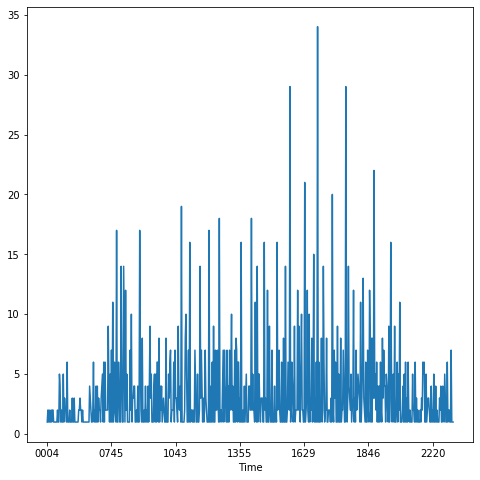

In [39]:
f,ax = plt.subplots(figsize=(8,8))
my_plot = time_totals.plot(kind='line')

## Question 4:  Are all the causes responsible for death?

In [40]:
df['CasualtySeverity'].value_counts()

Slight     1879
Serious     309
Fatal        15
Name: CasualtySeverity, dtype: int64

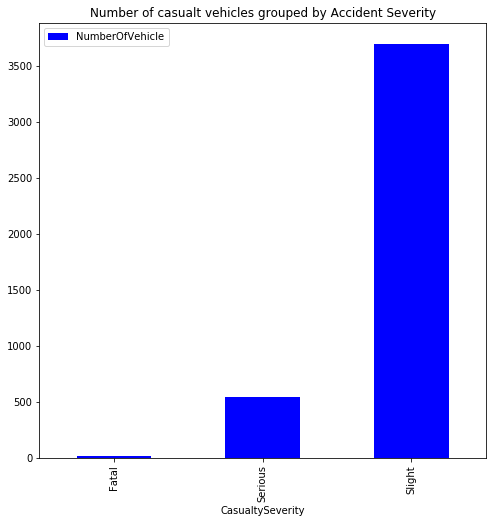

In [41]:
f,ax = plt.subplots(figsize=(8,8))
ASC = df.groupby(['CasualtySeverity']).sum()['NumberOfVehicle'].to_frame().plot(kind='bar',ax=ax, color='b')
ax.title.set_text('Number of casualt vehicles grouped by Accident Severity')

Result: The answer is No! The accidents are mosly slightly.

## Question 5: On the second week of the Fall semester, a school trip will be organized for primary school students who are between 7 and 11. Students will go and come back with car or bus. What are conditions?

#### I am creating a new data set called schooltrip as using existing data set called df. The new data set will contain Accident Date, Type of vehicle and Age of Casualty information.

In [42]:
schooltrip = df[['AccidentDate', 'TypeVehicle', 'AgeCasualty']]

In [43]:
schooltrip.head()

,AccidentDate,TypeVehicle,AgeCasualty
0,2017-03-17,Car,61
1,2017-01-14,Pedal cycle,36
2,2017-01-01,Car,32
3,2017-01-01,Car,30
4,2017-01-01,Car,26


In [44]:
trip_group=df.groupby(['AccidentDate','TypeVehicle', 'AgeCasualty']).size()

In [45]:
trip_group

AccidentDate  TypeVehicle                                                        AgeCasualty
2017-01-01    Car                                                                26             1
                                                                                 30             1
                                                                                 32             1
                                                                                 34             1
2017-01-02    Car                                                                17             1
                                                                                               ..
2017-12-30    Pedal cyclePedal cycle                                             65             1
2017-12-31    Car                                                                19             1
                                                                                 20             1
                         

#### The trip will be held on the second week of fall semester.

#### Condition 1: The trip will be held on the second week of fall semester.

In [46]:
trip_start_date = "2017-09-14"
trip_end_date = "2017-10-01"

In [47]:
mask_trip_date = (schooltrip['AccidentDate'] >= trip_start_date ) & (schooltrip['AccidentDate'] <= trip_end_date)

In [48]:
df_schooltrip_date = schooltrip.loc[mask_trip_date]
df_schooltrip_date

,AccidentDate,TypeVehicle,AgeCasualty
1444,2017-09-14,Motorcycle Motorcycle over 500cc0cc and underP...,36
1445,2017-09-14,Car,32
1446,2017-09-14,Car,27
1447,2017-09-15,Car,37
1448,2017-09-15,Car,50
...,...,...,...
1553,2017-10-01,Car,61
1554,2017-10-01,Car,23
1558,2017-10-01,Pedal cycleCar,88
1559,2017-10-01,Car,58


#### Condition 2: The passangers will be between 7 and 11.

In [49]:
school_age_start = 7
school_age_finish = 11

In [50]:
mask_trip_age = (df_schooltrip_date['AgeCasualty'] >= school_age_start ) & (df_schooltrip_date['AgeCasualty'] <= school_age_finish)

In [51]:
df_schooltrip_age = df_schooltrip_date.loc[mask_trip_age]

In [52]:
df_schooltrip_age

,AccidentDate,TypeVehicle,AgeCasualty
1523,2017-09-26,Car,11
1541,2017-09-29,Pedal cycle,11


#### Condition 3: The vehicle will be a car or a bus.

In [53]:
school_car = 'Car'

In [54]:
mask_trip_car = (df_schooltrip_age['TypeVehicle'] == school_car )

In [55]:
df_schooltrip_car = df_schooltrip_age.loc[mask_trip_car]

In [56]:
df_schooltrip_car

,AccidentDate,TypeVehicle,AgeCasualty
1523,2017-09-26,Car,11


In [57]:
df_schooltrip_car.count()

AccidentDate    1
TypeVehicle     1
AgeCasualty     1
dtype: int64

## Question 6: On the second week of the Fall semester, a school trip will be organized for primary school students who are between 7 and 11. Students will go and come back with car or bus. What is the  possibility of an accident occured?

#### There are 2203 accidents in total and according to the latest filtered data df_schooltrip_car.count(), there is only one accident that conforms all conditions. In order to show percentage information, one of the best way is using pie/donut chart for the data: 2203, 1.

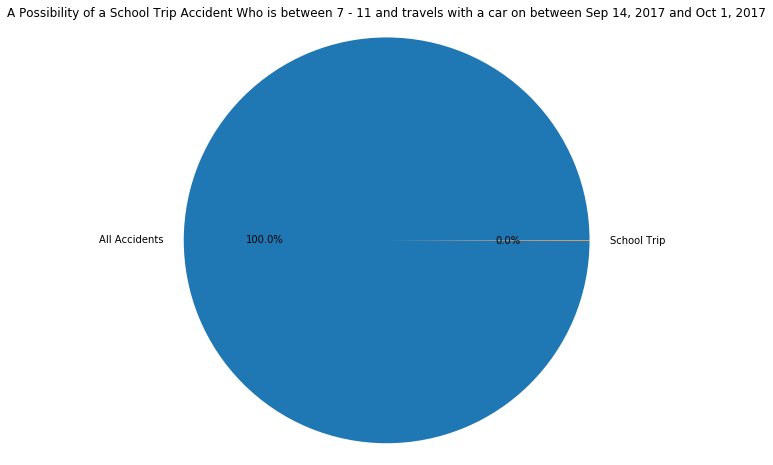

In [58]:
labels = ['All Accidents', 'School Trip']
sizes = [len(df), len(df_schooltrip_car)]


fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('A Possibility of a School Trip Accident Who is between 7 - 11 and travels with a car on between Sep 14, 2017 and Oct 1, 2017')


plt.show()

The result is less than 1% and equal to 0.04539264639128461%

## Question 7: Road maintenance work will be carried out on all motorways except for A for one week. What is possibility of an accident occurred?

In [59]:
openedroadclass = df[['1stRoadClass']]  

In [60]:
openedroadclass.head()

,1stRoadClass
0,A643
1,A61
2,A653
3,A653
4,U


In [61]:
A643 = 'A643'
A61 = 'A61'
A653 = 'A653'
A6038 = 'A6038'
A659 = 'A659'
A642 = 'A642'
A656 =  'A656'
A62 = 'A62'
A64 = 'A64'
A6120 ='A6120'
A6110 = 'A6110'
A6210 = 'A6210'
A168 = 'A168'
A654 ='A654'
A63 = 'A63'
A639 = 'A639'
A657 = 'A657'
A647 = 'A647'
A658 = 'A658'
A660 = 'A660'
A65 = 'A65'
A58 = 'A58'
A650 = 'A650'

In [62]:
mask_openedroad =  (openedroadclass['1stRoadClass'] == A643 ) | (openedroadclass['1stRoadClass'] == A61) | (openedroadclass['1stRoadClass'] == A653) | (openedroadclass['1stRoadClass'] == A6038) | (openedroadclass['1stRoadClass'] == A659) | (openedroadclass['1stRoadClass'] == A642) | (openedroadclass['1stRoadClass'] == A656) | (openedroadclass['1stRoadClass'] == A62) | (openedroadclass['1stRoadClass'] == A64) | (openedroadclass['1stRoadClass'] == A6120) | (openedroadclass['1stRoadClass'] == A6110) | (openedroadclass['1stRoadClass'] == A6210) | (openedroadclass['1stRoadClass'] == A168) | (openedroadclass['1stRoadClass'] == A654) | (openedroadclass['1stRoadClass'] == A63) | (openedroadclass['1stRoadClass'] == A639) | (openedroadclass['1stRoadClass'] == A657) | (openedroadclass['1stRoadClass'] == A647) | (openedroadclass['1stRoadClass'] == A658) | (openedroadclass['1stRoadClass'] == A660) | (openedroadclass['1stRoadClass'] == A65) | (openedroadclass['1stRoadClass'] == A58) | (openedroadclass['1stRoadClass'] == A650)

In [63]:
df_openedroad = openedroadclass.loc[mask_openedroad]

In [64]:
df_openedroad

,1stRoadClass
0,A643
1,A61
2,A653
3,A653
14,A650
...,...
2182,A6120
2187,A6120
2188,A639
2189,A639


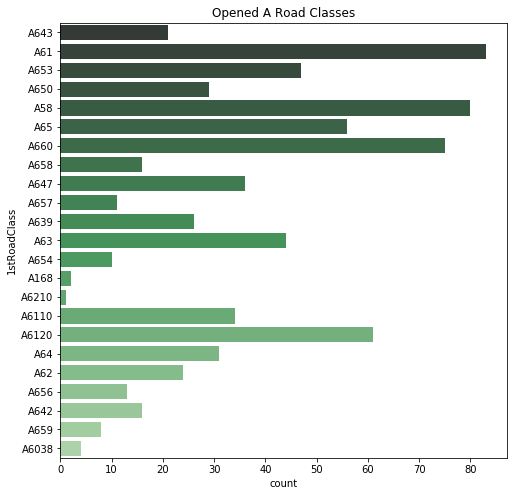

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y="1stRoadClass", data=df_openedroad, palette="Greens_d").set_title('Opened A Road Classes');

## Question 8 :  Students who is age of 23- 24 are leaving from the graduation party on a rainy day at midnight at 3 o'clock. What is possibility of an accident occurred?

In [66]:
gradparty = df[['AccidentDate', 'RoadSurface', 'AgeCasualty','Time']]

In [67]:
gradparty.head()

,AccidentDate,RoadSurface,AgeCasualty,Time
0,2017-03-17,Dry,61,0815
1,2017-01-14,Dry,36,1330
2,2017-01-01,Wet/Damp,32,0805
3,2017-01-01,Wet/Damp,30,0805
4,2017-01-01,Wet/Damp,26,1705


In [68]:
party_group=df.groupby(['AccidentDate','RoadSurface', 'AgeCasualty','Time']).size()

In [69]:
party_group

AccidentDate  RoadSurface  AgeCasualty  Time
2017-01-01    Dry          34           1200    1
              Wet/Damp     26           1705    1
                           30           0805    1
                           32           0805    1
2017-01-02    Dry          17           1807    1
                                               ..
2017-12-31    Dry          21           1345    1
              Snow         19           1515    1
                           21           1515    1
              Wet/Damp     20           2111    1
                           23           1935    1
Length: 2167, dtype: int64

In [70]:
party_start_date = "2017-06-14"
party_end_date = "2017-06-14"

In [71]:
mask_party_date = (gradparty['AccidentDate'] >= party_start_date ) & (gradparty['AccidentDate'] <= party_end_date)

In [72]:
df_gradparty_date = gradparty.loc[mask_party_date]
df_gradparty_date

,AccidentDate,RoadSurface,AgeCasualty,Time
924,2017-06-14,Dry,20,0639
925,2017-06-14,Dry,17,0850
926,2017-06-14,Dry,35,2141


In [73]:
party_age_start = 23
party_age_finish = 24

In [74]:
mask_party_age = (df_gradparty_date['AgeCasualty'] >= party_age_start ) & (df_gradparty_date['AgeCasualty'] <= party_age_finish)

In [75]:
df_gradparty_age = df_gradparty_date.loc[mask_party_age]

In [76]:
df_gradparty_age

,AccidentDate,RoadSurface,AgeCasualty,Time


In [77]:
##There is no accident that day.

## Question 9: What is the total number of accidents by daytime ?

In [78]:
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'])

In [79]:
df['AccidentDate']= pd.to_datetime(df['AccidentDate'], format="%d/%m/%Y")

In [80]:
daytime_groups = {1: 'Morning (5-10)', 
                  2: 'Office Hours (10-15)', 
                  3: 'Afternoon Rush (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [81]:
# slice first and second string from time column
df['Hour'] = df['Time'].str[0:2]

# convert new column to numeric datetype
df['Hour'] = pd.to_numeric(df['Hour'])

# drop null values in our new column
df = df.dropna(subset=['Hour'])

# cast to integer values
df['Hour'] = df['Hour'].astype('int')

In [82]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"
    
# apply this function to our temporary hour column
df['Daytime'] = df['Hour'].apply(when_was_it)
df[['Time', 'Hour', 'Daytime']].tail()

,Time,Hour,Daytime
2198,1515,15,3
2199,1935,19,4
2200,2111,21,4
2201,2320,23,5
2202,1400,14,2


In [83]:
# drop old time column and temporary hour column
df = df.drop(columns=['Time', 'Hour'])

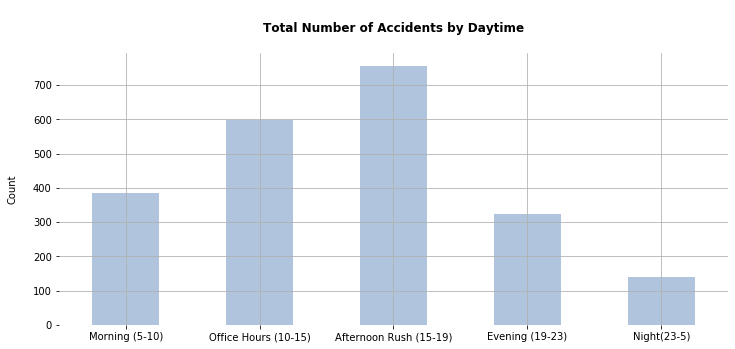

In [84]:
# define labels by accessing look up dictionary above
labels = tuple(daytime_groups.values())

# plot total no. of accidents by daytime
df.groupby('Daytime').size().plot(kind='bar', color='lightsteelblue', figsize=(12,5), grid=True)
plt.xticks(np.arange(5), labels, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\nTotal Number of Accidents by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [85]:
print(df['CasualtyClass'].value_counts())

Driver or rider                 1296
Vehicle or pillion passenger     586
Pedestrian                       321
Name: CasualtyClass, dtype: int64


## Question 10: Using machine learning algorithm decision trees and random forest according to accident casual severity.

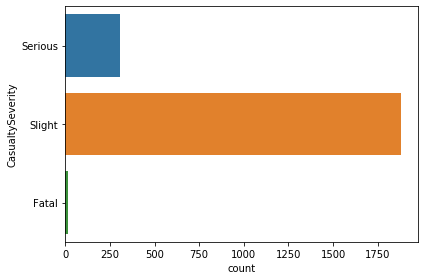

In [86]:
#characterstick graph
#severity vs count
sns.countplot(y = "CasualtySeverity" , data = df )
plt.tight_layout()

In [87]:
#here we check for outlier and boundries

pd.DataFrame( {"count": df["CasualtySeverity"].value_counts().values } , index = df["CasualtySeverity"].value_counts().index )


,count
Slight,1879
Serious,309
Fatal,15


### Prepare to data for algorithm.
I get what i need to columns and set it according to algorithm.

In [88]:
df.CasualtySeverity = df.CasualtySeverity.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})

In [89]:
df['Month'] = df["AccidentDate"].astype(np.datetime64).dt.month

In [90]:
df.drop(columns = ['RefNum', 'AccidentDate'], axis=1, inplace=True)

In [91]:
df.dropna(inplace = True)

In [92]:
df.head(1)

,GridRefEast,GridRefNorth,NumberOfVehicle,1stRoadClass,RoadSurface,LightCondition,WeatherCondition,TypeVehicle,CasualtyClass,CasualtySeverity,SexCasualty,AgeCasualty,Daytime,Month
0,426340,428455,1,A643,Dry,Daylight: Street lights present,Other,Car,Pedestrian,1,Female,61,1,3


# Train Test Split


That means we need to transform them using dummy variables so sklearn will be able to understand these.This in one clean step using pd.get_dummies. The way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [93]:
df2 = pd.get_dummies(df, columns=['GridRefEast','GridRefNorth','NumberOfVehicle','1stRoadClass', 'RoadSurface','LightCondition','WeatherCondition','TypeVehicle', 'CasualtyClass', 'SexCasualty', 'AgeCasualty', 'Daytime', 'Month'])

In [94]:
df2.CasualtySeverity.value_counts() / len(df2)

0    0.852928
1    0.147072
Name: CasualtySeverity, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df2.drop('CasualtySeverity',axis=1)

Y = df2.CasualtySeverity

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

# Decision Trees

Import DecisionTreeClassifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [98]:
dtree = DecisionTreeClassifier()

In [99]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Prediction and Evaluation

Create predictions from the test set and create a classification report and a confusion matrix.

In [100]:
predictions = dtree.predict(X_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       559
           1       0.34      0.16      0.21       102

    accuracy                           0.82       661
   macro avg       0.60      0.55      0.56       661
weighted avg       0.78      0.82      0.79       661



In [103]:
print(confusion_matrix(Y_test,predictions))

[[528  31]
 [ 86  16]]


# Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [104]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

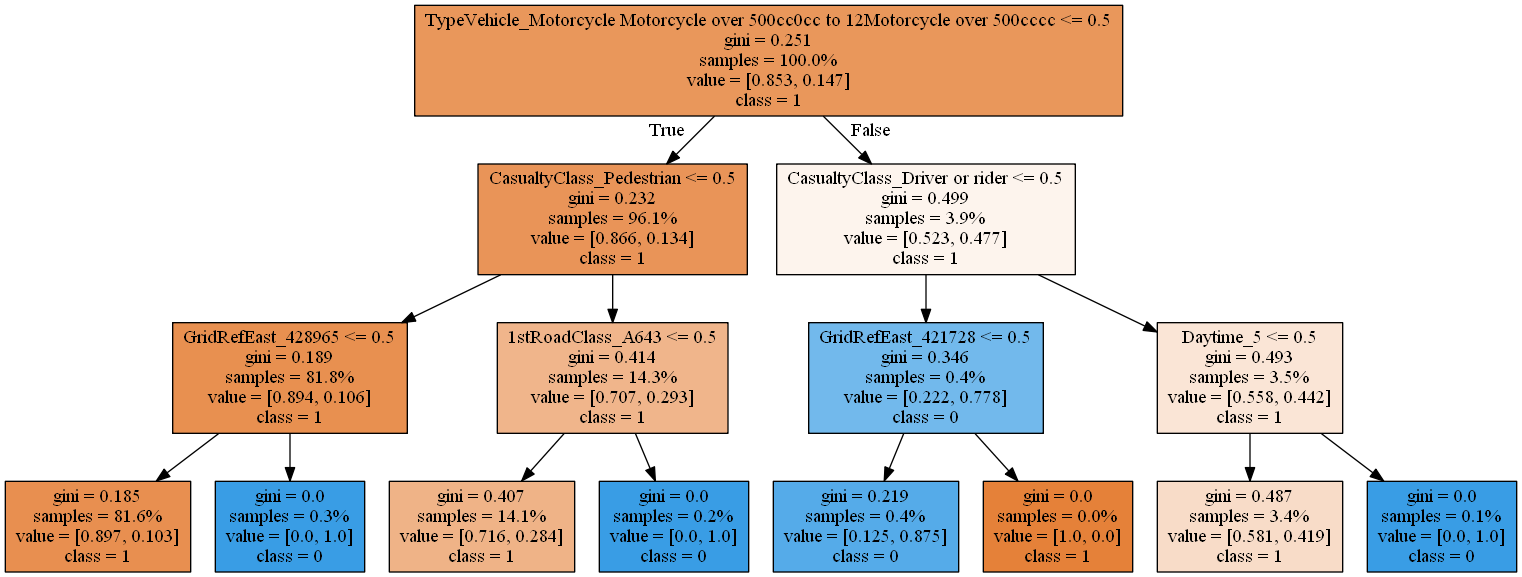

In [105]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', proportion = True, 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


##### The tree above demonstrates the following findings:

Motorcycles over 500cc
Among all types of vehicles, motorcycles over 500cc are much more prone to severe accidents. Within the accidents happening to them, 42.4% are severe.
The accidents happening to motorcycles over 500cc in rural areas is more dangerous: over 50% are severe accidents. The most dangerous situation is on roads with speed limits over 55 mph in rural areas: the severe accident rate is 58.2%.

# Random Forests
###### Now let's compare the decision tree model to a random forest.
Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
rfc_pred = rfc.predict(X_test)

### Show the Confusion Matrix for the predictions.
Create a classification report from the results.

In [108]:
print(confusion_matrix(Y_test,rfc_pred))

[[556   3]
 [ 96   6]]


In [109]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       559
           1       0.67      0.06      0.11       102

    accuracy                           0.85       661
   macro avg       0.76      0.53      0.51       661
weighted avg       0.82      0.85      0.79       661

